# Getting started with Qiskit

Yuri Kobayashi, IBM Quantum (Jan 18, 2024)

### **Qiskit**

- **Terra** -- Solid foundation for running quantum circuits on device and simulator backends
- **Aer** -- Simulators + noise models
- **Qiskit Runtime** -- A programming model and execution framework to effectively execute workloads.
- **Qiskit Runtime Primitives** -- A simple pre-made program — core functions that a programmer can use to take care of basic tasks. Currently, Qiskit provides the following two primitives.
  - **Sampler** is useful for those who want to examine the counts from each measurement with greater context. Sampler allows you to obtain error-mitigated readout of quasiprobabilities.
  - **Estimator** makes it possible to efficiently calculate and interpret expectation values of the quantum operators that are required for many algorithms.


In [ ]:
# Let's import necessary Qiskit libraries first
from qiskit import QuantumCircuit
from qiskit import Aer

# For plotting your data
import matplotlib.pyplot as plt

## One qubit circuit
Let's begin by creating a simple quantum circuit. To run your code in this notebook, select each cell and press **Shift ＋ Enter**.

In [ ]:
# Create a circuit with one qubit
qc = QuantumCircuit(1)

# Draw the circuit
qc.draw(output="mpl")

## An Initial Qubit State

A single qubit can be written as a quantum state.
$$|ψ\rangle = α|0\rangle+β|1\rangle$$
The coefficients **α** and **β** are usually called complex amplitudes where **α**, **β** **∈** $\mathbb{C}$. <br>
 $|α|^2$ is the probability of measuring the state $|0\rangle$ and $|β|^2$ is the probability of measuring the state $|1\rangle$. (i.e. $|α|^2 + |β|^2=1$)

Let us visualize the qubit on a bloch sphere. We wil use a **statevector simulator** to return a statevector of the qubit we want to visualize. 

In [ ]:
# Statecevoctor simulator
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# Visualize the state on a bloch sphere
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result, figsize=(3,3))

## Quantum Logic Gates

Now, let us take a look at different quantum logic gates, starting with some of the most common ones. 

### X Gate

In [ ]:
qc = QuantumCircuit(1)    # Prepare a circuit with one qubit

# Apply an X gate on the 0th qubit
qc.x(0)

# Draw the circuit
qc.draw(output="mpl")

Applying an X gate transforms the initial qubit state as follows:

$X|0\rangle=  \begin{pmatrix}
0 & 1 \\\
1 & 0
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\begin{pmatrix}
0 \\\
1
\end{pmatrix} = |1\rangle$ 

Let's visualize our new transformed state using a statevector simulator again. 

In [ ]:
# Run a statevector simulator and print results
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# Visualize the state on a bloch sphere
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result, figsize=(3,3))

### H Gate
Let's create a $|+\rangle$ state

In [ ]:
qc = QuantumCircuit(1)    # Prepare a cirtcuit with one qubit

# Apply an Hadamard gate on the qubit
qc.h(0)

# Draw the circuit
qc.draw(output="mpl")

Applying an H gate transforms the initial qubit state as follows:

$H|0\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle+|1\rangle)$ 




By applyting the $H$ gate on $|0\rangle$, we can create a superposition of $|0\rangle$ and $|1\rangle$ where measurement would give you each state with equal probabilities.

In [ ]:
# Run a statevector simulator to get the results
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# Visualize the state on a bloch sphere
plot_bloch_multivector(result, figsize=(3,3))

### Create a $|-\rangle$ state

In [ ]:
qc = QuantumCircuit(1)     # Prepare a cirtcuit with one qubit

# Apply an X gate on the qubit
qc.x(0)

# Then apply a Hadamard (H) gate on the qubit
qc.h(0)

# Draw the circuit
qc.draw(output="mpl")

In [ ]:
# Run a statevector simulator to get the results
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# Visualize the state on a bloch sphere
plot_bloch_multivector(result, figsize=(3,3))

$H|1\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
0 \\\
1
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
-1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
-0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle-|1\rangle)$


By applying an $H$ gate on $|1\rangle$, we created a superposition of $|0\rangle$ and $|1\rangle$ with a minus sign on the $|1\rangle$ state.

You can explore other gates here: https://docs.quantum.ibm.com/build/circuit-construction

# Two qubit circuit

In [ ]:
# Create a circuit with two qubits
qc = QuantumCircuit(2)

# Apply a Hadamard (H) gate on the first qubit
qc.h(0)

# Then apply a Hadamard (H) gate on the second qubit。
qc.h(1)

# Draw the circuit
qc.draw(output="mpl")

In [ ]:
# Run a statevector simulator to get the results
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

A physical system with multiple qubit states can be expressed by their tensor products.

$|q0\rangle \otimes|q1\rangle = (a|0\rangle+b|1\rangle) \otimes (c|0\rangle+d|1\rangle) $

$= ac|0\rangle|0\rangle+ad|0\rangle|1\rangle+bc|1\rangle|0\rangle+bd|1\rangle|1\rangle$

$= ac|00\rangle+ad|01\rangle+bc|10\rangle+bd|11\rangle$

($|ac|^2+ |ad|^2+ |bc|^2+ |bd|^2=1$ )


Both qubits are initially in the $|0\rangle|0\rangle=|00\rangle$ state, therefore, by applying an $H$ on each of these qubits you can create a superposition state as follows:

$H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

$$ 
=\frac{1}{2}\left( \begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix}\right) = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}=\frac{1}{2}\left(\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}\right)
$$


In [ ]:
# Visualize the state on a bloch sphere
plot_bloch_multivector(result, figsize=(3,3))

# QASM Simulator

We will need measurements, as the QASM simulator simulates an ideal (with no noise) quantum hardware by default. Note: A QASM simulator can also apply a noise model based on real backend. 

In [ ]:
# Create a circuit with two quantum registers and two classical registers
qc = QuantumCircuit(2,2)

# Apply the quantum logic gates
qc.h(0)
qc.h(1)

# Add measurements
qc.measure(0,0)    # Measure q0 and store the results in the classical register c0
qc.measure(1,1)    # Measure q1 and store the results in the classical register c1

# Draw the circuit
qc.draw(output="mpl")

With the measurements, we are now ready to run our circuit on a QASM simulator. In this example, we will apply shots=1024, which means we will measure 1024 times. Then we will plot those counts in a histograpm.

In [ ]:
# Run the circuit on a QASM simulator to get the results
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()

#  Print the results
counts = result.get_counts(qc)
print(counts)

## Plot the counts in a histogram
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts, figsize=(4,3) )

As expected, the states $|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$ were measured almost 25% each.

# CNOT Gate

A $CNOT$ Gate is a two-qubit gate and flips the target qubit only when the control qubit is $|1\rangle$.  
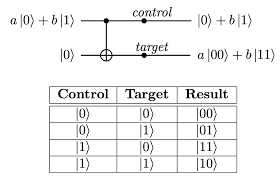

Let us first simulate the statevector of this two-qubit gate when q0 and q1 are both $|0\rangle$.  
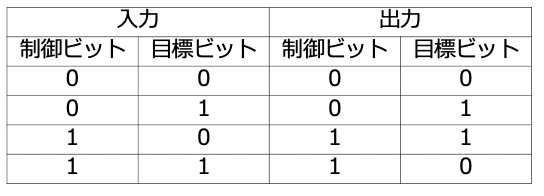

In [ ]:
# Create a circuit with two quantum registers and two classical registers
qc = QuantumCircuit(2,2)

# Apply the CNOT (cx) gate to a $|00\rangle$ state.
qc.cx(0,1)   # Here the control is set to q0 and the target is set to q1.

# Draw the circuit
qc.draw(output="mpl")

In [ ]:
# Run a statevector simulator to get the results
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

As exoected, applying a $CX$ gate on $|00\rangle$ did not change the state.

### Qiskit bit ordering

Qiskit uses **Little Endian** notations for qubits and bits ordering, meaning **the least significant bit (qubit 0) is the rightmost bit** in the bitstrings. Example: $|01\rangle$ means q0 is |1\rangle$ and q1 is |0\rangle$. Be careful because most of the litterature in quantum computing use the Big Endian notation.


$$|q_nq_{n-1}...q_1q_0\rangle \Rightarrow b_nb_{n-1}...b_1b_0 $$

Another thing to notice is that when representing a quantum circuit, in both cases $|q_0\rangle$ is written at the first idle at the top of the circuit.


Let's get back to our CNOT operation. This time we will apply a $CX$ gate on $|01\rangle$ and see what happens.


In [ ]:
qc = QuantumCircuit(2,2)

# q0=1, q1=0
qc.x(0)    # Apply a $X$ gate to initialize  q0 to 1
qc.cx(0,1)   # Set the control bit to q0 and the target bit to q1.

# Draw the circuit
qc.draw(output="mpl")

In [ ]:
# Run a statevector simulator to get the results
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

By applying a $CX$ gate, the $|01\rangle$ state has now become $|11\rangle$.

Let us verify these results by runing the circuit on a QASM simulator.

In [ ]:
# Add measurements
qc.measure(0,0)
qc.measure(1,1)

# Draw the circuit
qc.draw(output="mpl")

In [ ]:
# Run the circuit on a QASM simulator to get the results
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()

#  Print the results
counts = result.get_counts(qc)
print(counts)

## Plot the counts in a histogram
plot_histogram(counts, figsize=(4,3) )

The results should show you that $|11\rangle$ has been measured with 100% probability.


# Entanglement and running your circuit on a real quantum device.
Let us first create an engangled state and then measure this on a real quantum computer.

Let's generate a quantum entangled state (entanglement state), which is also an important state in quantum computation.
Entanglement is a state in which two qubits has strong corelations.
It is used in quantum teleportation.

One example of a two-qubit entangled state may look like:
$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$

This is when two qubits are in a superposition state; when one qubit is in $|0\rangle$ then the other qubit is in the $|0\rangle$ state, and when one qubit is in the $|1\rangle$ state the other qubit is in the state $|1\rangle$. This means, when one qubit measures a certain state, the other qubit will have corelated outcome. Therefore, as a two-qubit system, there will be an equal probability of measuring $|00\rangle$ and $|11\rangle$. <br>

To create this entangled state, we first need to create a superposition of one of the qubits as shown below:
$$ |00\rangle \rightarrow  \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|01\rangle  $$

Then apply a CNOT (CX) gate to entangle the two qubits. Here we are setting q0 as the control and q1 as the target. This is why you see a 'bitflip' when the qubit on the LSB is 1.
$$ CX(\frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|01\rangle) \rightarrow \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|11\rangle $$

Now let's build a circuit to create a two-qubit entanglement.<br>


In [ ]:
# Create a circuit with two quantum registers and two classical registers
qc = QuantumCircuit(2,2)

# Create entanglement by applying a hadamard and then a CNOT gate
qc.h(0)
qc.cx(0, 1)

# Measure the circuit
qc.measure(0, 0)
qc.measure(1, 1)

# Draw the circuit
qc.draw(output="mpl")

In [ ]:
# Run the circuit on a QASM simulator to get the results
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()

#  Print the results
counts = result.get_counts(qc)
print(counts)

# Plot the counts as a histogram
plot_histogram(counts, figsize=(4,3))

Let us now run this same circuit on a real quantum computer.
If you do not have IBM Provider, you will need to install this first. When running your Qiskit code in IBM Quantum Lab, you do not need this step. For more information about IBM Provider:[Qiskit IBM Quantum Provider documentation](https://qiskit.org/ecosystem/ibm-provider/index.html)

In [ ]:
# Install IBM Provider
#!pip install qiskit-ibm-provider

Now, let us run this circuit on a real quantum device. 


In [ ]:
from qiskit_ibm_provider import IBMProvider

# If this is your first time running your circuit on a real device, make sure you copy your API Token from [IBM Quantum Platform](https://quantum.ibm.com/) 
IBMProvider.save_account(token='<your_token>', overwrite=True)

# Update the instance to your own provide instance.
provider = IBMProvider(instance='ibm-q-utokyo/riken/internal')

### Finding the least busy device

In [ ]:
#You can also identify the least busy device
from qiskit_ibm_provider import least_busy

small_devices = provider.backends(simulator=False, operational=True, min_num_qubits=2)
real_backend = least_busy(small_devices)
print(real_backend.name)

In [ ]:
# Transpile the circuit into basis gates executable on the hardware
from qiskit import transpile
qc_compiled = transpile(qc, real_backend)
# Run the circuit on a real backend specified above
job = real_backend.run(qc_compiled, shots=1024)

In [ ]:
job_id = job.job_id()
print(job_id)

In [ ]:
# Check the job status
retrieve_job = provider.backend.retrieve_job(job_id)
retrieve_job.status()

You can also check the job status from your IBM Quantum Dashboard：https://quantum.ibm.com/jobs

In [ ]:
# # If the Notebook session got disconnected you can also check your job statuse by running the followuing code
# from qiskit_ibm_provider import IBMProvider
# provider = IBMProvider()
# real_backend = provider.get_backend('ibm_xxxx') # Input the device you are using
# retrieve_job = provider.backend.retrieve_job('<your-job-id>') # Input your job-id between the quotations
# retrieve_job.status()

In [ ]:
from qiskit.tools.visualization import plot_distribution

real_result= retrieve_job.result()
print(real_result.get_counts())
plot_distribution(real_result.get_counts(), figsize=(4,3))

In [ ]:
# You may also choose an available backend 
real_backend = provider.get_backend('ibm_cairo')   # When choosing 'ibm_cairo' as your backend

# Qiskit Runtime Primitives
Qiskit Runtime is a programming model and containerized execution environment for deploying quantum programs.
Qiskit Runtime Primitive has built-in circuit optimization and error mitigation features by default.


### Sampler

With Sampler, we can obtain quasi-probabilities from our results.

In [ ]:
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import Estimator, Sampler
from qiskit.tools.visualization import plot_distribution

# Create a bell state
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Run on a simulator and obtain results
sampler = Sampler()
job = sampler.run(qc)
prob_distribution = job.result().quasi_dists[0].binary_probabilities()

# Plot in a histogram
print(prob_distribution)
plot_distribution(prob_distribution, figsize=(4,3))

When running on a real machine, install Qiskit Runtime if you have not already done so; if you are running on IBM Quantum Lab, you do not need to install it; see also this guide for more information about IBM Provider:https://qiskit.org/ecosystem/ibm-runtime/locale/ja_JP/getting_started.html

In [ ]:
# Install Qiskit Runtime if not already
#!pip install qiskit-ibm-runtime

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler

# Run only if it is your first time using Runtime
# QiskitRuntimeService.save_account(channel='ibm_quantum', token=<IBM Quantum API key>)

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q-utokyo/riken/internal', #Replace with your hub instance information
    #instance='ibm-q-internal/deployed/default',
)

In [ ]:
# Find the least busy system you have acccess to
from qiskit_ibm_provider import least_busy

small_devices = service.backends(simulator=False, operational=True, min_num_qubits=2)
real_backend = least_busy(small_devices)
print(real_backend.name)

In [ ]:
# # For specifying a device
# real_backend = service.get_backend('ibm_<devicename>')

In [ ]:
with Session(service, backend=real_backend) as session:
    sampler = Sampler(session=session)
    job_real = sampler.run(qc)
    job_id = job_real.job_id()
    print(job_id)

In [ ]:
retrieve_job = service.job(job_id)
retrieve_job.status()

In [ ]:
# # In case your notebook session got disconnected, you can retrieve your job status by speficying the job_id.

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
retrieve_job = service.job('cpmb8ntsp83g008y4r80') #Insert your job_id in the quotations
retrieve_job.status()

In [ ]:
prob_distribution_real = retrieve_job.result().quasi_dists[0].binary_probabilities()

plot_distribution(
    data=[prob_distribution, prob_distribution_real], 
    legend=['Simulator', 'Real Device'], 
    color=['lightblue', 'black'], 
    bar_labels = False,
    figsize=(4,3)
)

### Estimator
With **Estimator**, we can find the expectation value of observables. 
We do not use a measure in our circuit but instead, we need to prepare an observable operator which we will call `obs` in this example. This is because the expectation value ⟨𝑂⟩=⟨𝜓|𝑂|𝜓⟩ is computed exactly by performing all the linear algebra calculations implemented in the method [Statevector.expectation_value](https://github.com/Qiskit/qiskit/blob/main/qiskit/quantum_info/states/statevector.py#). In our circuit below `qc` is the QuantumCircuit preparing your state 𝜓 and `obs` is your operator 𝑂.

In [ ]:
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import Estimator, Sampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.tools.visualization import plot_distribution

# Create a bell state
qc = QuantumCircuit(1)
qc.h(0)

# Prepare an observable
obs = list(SparsePauliOp(['Z', 'X']))

# Run the circuit on a simulator and calcualate the expectation value of the observable.
estimator = Estimator()
job = estimator.run([qc]*len(obs), observables=obs)
print('Z:', job.result().values[0], 'X:', job.result().values[1])

## Challenge Exercise - Now it's your turn to play! 
<div class="alert alert-block alert-info">
<b>Challenge 1:</b>
Here's the challenge for you: In the following cells, create a GHZ (Greenberger, Horne and Zeilinger) circuit, to produce a three maximally entangled quantum states and get the results of the measures. 
</div>


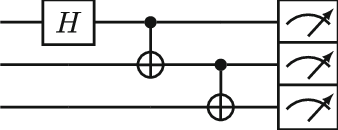

<div class="alert alert-success">
<b>Step 1 :</b> Create the quantum circuit.
</div>

In [ ]:
from qiskit import QuantumCircuit

##### Insert code here #####

<div class="alert alert-success">
<b>Step 2 :</b> Add the gates to the qubits.
</div>

In [ ]:
##### Insert code here #####


<div class="alert alert-success">
<b>Step 3 :</b> Add the measures to the qubits.
</div>

In [ ]:
##### Insert code here #####


<div class="alert alert-success">
<b>Step 4 :</b> Draw the circuit to make sure you created the right one.
</div>

In [ ]:
##### Insert code here #####


<div class="alert alert-success">
<b>Step 5 :</b> Initialize the backend ibm_perth.
</div>


Remember this is how you load the provider (we already did it earlier so no need to do it once again) :

```
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
```

In [ ]:
##### Insert code here #####


<div class="alert alert-success">
<b>Step 6 :</b> Execute the circuit on the simulator using 1000 shots.
</div>

In [ ]:
##### Insert code here #####


<div class="alert alert-success">
<b>Step 7 :</b> Visualize the results.
</div>

In [ ]:
##### Insert code here #####


# Solutions
<div class="alert alert-success">
<b>Challenge solution</b>


In [ ]:
# Create the QuantumCircuit "qhz" 
qc = QuantumCircuit(3)

# Add gates 
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

# Add measure (all qubits)
qc.measure_all()

# Draw the circuit 
qc.draw(output='mpl')


In [ ]:
# execute your circuit using your backend "ibm_perth" for example
from qiskit.compiler import transpile
from qiskit import IBMProvider

# Load your account from disk
provider=IBMProvider() 

backend = provider.get_backend('ibm_perth')
trans = transpile(qc, backend)

job = backend.run(trans, shots=1000)

In [ ]:
# collect the job results and display them
result = job.result()

counts = result.get_counts()

plot_histogram(counts)